# QCTO - Workplace Module

### Project Title: Global Deforestation
#### Done By: Khupukani Maluleke

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---


### Purpose
This project aims to analyze global forest coverage trends over time, leveraging data from the Kaggle World Forest Area dataset. The primary goal is to identify patterns in forest coverage changes and assess the effectiveness of conservation efforts globally.

### Details
Forests play a crucial role in regulating the Earth's climate, supporting biodiversity, and providing livelihoods. However, deforestation poses a significant threat to these vital ecosystems. This project seeks to address specific questions such as:
- How has forest coverage changed in different regions over the past decades?
- What are the potential drivers behind these changes?
- Can we predict future trends in forest coverage?

By examining forest area both in absolute terms (km²) and as a percentage of total land area, this project will provide insights that could inform policy decisions and conservation strategies, helping to ensure the sustainability of forest resources worldwide.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
#Please use code cells to code in and do not forget to comment your code.
# Importing essential Python packages
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For creating visualizations
import numpy as np
import seaborn as sns              # For enhanced visualizations
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.linear_model import LinearRegression     # For linear regression modeling

# Setting visualizations to display inline in the notebook
%matplotlib inline

# Setting the default style for Seaborn
sns.set(style="whitegrid")


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

### Purpose
The purpose of this section is to describe the acquisition and characteristics of the datasets used in this project, which focus on the global forest area measured in both square kilometers and as a percentage of land area.

### Details
The datasets, `forest_area_km.csv` and `forest_area_percent.csv`, were sourced from Kaggle. They contain annual data on the forest area of various countries, detailing forest coverage in absolute terms and as a percentage of total land area. These datasets enable the analysis of deforestation trends globally and the evaluation of forest conservation efforts. The data is presented in both numerical (values like area in square kilometers) and categorical formats (country names, year), allowing for diverse analytical approaches to understanding forest dynamics over time.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
# Loading the datasets
forest_area_km = pd.read_csv('Data/forest_area_km.csv')
forest_area_percent = pd.read_csv('Data/forest_area_percent.csv')

# Displaying the first few rows of both datasets
print("Forest Area in Square Kilometers:")
print(forest_area_km.head())
print("\nForest Area as a Percentage of Total Land Area:")
print(forest_area_percent.head())

# Displaying the basic information about both datasets to understand their structure and the types of data they contain
print("\nDataset Info for Forest Area in Square Kilometers:")
forest_area_km.info()
print("\nDataset Info for Forest Area as a Percentage of Total Land Area:")
forest_area_percent.info()



Forest Area in Square Kilometers:
     Country Name Country Code     1990      1991      1992      1993  \
0     Afghanistan          AFG  12084.4  12084.40  12084.40  12084.40   
1         Albania          ALB   7888.0   7868.50   7849.00   7829.50   
2         Algeria          DZA  16670.0  16582.00  16494.00  16406.00   
3  American Samoa          ASM    180.7    180.36    180.02    179.68   
4         Andorra          AND    160.0    160.00    160.00    160.00   

       1994     1995      1996      1997  ...      2012       2013      2014  \
0  12084.40  12084.4  12084.40  12084.40  ...  12084.40  12084.400  12084.40   
1   7810.00   7790.5   7771.00   7751.50  ...   7849.17   7863.405   7877.64   
2  16318.00  16230.0  16142.00  16054.00  ...  19332.00  19408.000  19484.00   
3    179.34    179.0    178.66    178.32  ...    173.70    173.400    173.10   
4    160.00    160.0    160.00    160.00  ...    160.00    160.000    160.00   

        2015     2016       2017     2018     

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

# Load the datasets
forest_area_km = pd.read_csv('Data/forest_area_km.csv')
forest_area_percent = pd.read_csv('Data/forest_area_percent.csv')

# Renaming 'Country Name' and 'Country Code' to 'Country_Name' and 'Country_Code'
forest_area_km.rename(columns={'Country Name': 'Country_Name', 'Country Code': 'Country_Code'}, inplace=True)
forest_area_percent.rename(columns={'Country Name': 'Country_Name', 'Country Code': 'Country_Code'}, inplace=True)

# Check for missing values in both datasets
print("Missing values in forest_area_km dataset:")
print(forest_area_km.isnull().sum())
print("\nMissing values in forest_area_percent dataset:")
print(forest_area_percent.isnull().sum())

# Filling missing values with the mean for numeric columns only
numeric_columns_km = forest_area_km.select_dtypes(include=[np.number]).columns
forest_area_km[numeric_columns_km] = forest_area_km[numeric_columns_km].fillna(forest_area_km[numeric_columns_km].mean())

numeric_columns_percent = forest_area_percent.select_dtypes(include=[np.number]).columns
forest_area_percent[numeric_columns_percent] = forest_area_percent[numeric_columns_percent].fillna(forest_area_percent[numeric_columns_percent].mean())

# Removing outliers using Z-score for numeric columns in 'forest_area_km'
forest_area_km[numeric_columns_km] = forest_area_km[numeric_columns_km][(np.abs(stats.zscore(forest_area_km[numeric_columns_km])) < 3).all(axis=1)]

# Filter data to only include years from 1990 onwards
years = [str(year) for year in range(1990, 2022)]  # List years from 1990 to 2021
forest_area_km = forest_area_km[['Country_Name', 'Country_Code'] + years]
forest_area_percent = forest_area_percent[['Country_Name', 'Country_Code'] + years]

# Display the cleaned datasets
print("\nCleaned forest_area_km dataset:")
print(forest_area_km.head())
print("\nCleaned forest_area_percent dataset:")
print(forest_area_percent.head())


Missing values in forest_area_km dataset:
Country_Name     0
Country_Code     0
1990            44
1991            40
1992            11
1993             8
1994             8
1995             8
1996             8
1997             8
1998             8
1999             8
2000             6
2001             6
2002             6
2003             6
2004             6
2005             6
2006             4
2007             4
2008             4
2009             4
2010             4
2011             1
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
dtype: int64

Missing values in forest_area_percent dataset:
Country_Name     0
Country_Code     0
1990            44
1991            40
1992            11
1993             8
1994             8
1995             8
1996             8
1997             8
1998             8
1999             8
2000             6
2001

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---



### *1. Statistical Summary*

In [5]:
#Please use code cells to code in and do not forget to comment your code.
# Summary statistics for forest_area_km
print("Summary statistics for forest_area_km dataset:")
print(forest_area_km.describe())

# Summary statistics for forest_area_percent
print("\nSummary statistics for forest_area_percent dataset:")
print(forest_area_percent.describe())

Summary statistics for forest_area_km dataset:
               1990          1991          1992          1993          1994  \
count  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02   
mean   6.964990e+05  6.760169e+05  7.765232e+05  7.530102e+05  7.513565e+05   
std    1.502044e+06  1.498467e+06  1.857376e+06  1.852559e+06  1.848656e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.615150e+03  4.023685e+03  3.738905e+03  3.749233e+03  3.774735e+03   
50%    8.825585e+04  7.699777e+04  4.405455e+04  3.841873e+04  3.850129e+04   
75%    9.839669e+05  8.157779e+05  3.050197e+05  2.520489e+05  2.515852e+05   
max    7.339644e+06  7.306916e+06  1.023181e+07  1.028583e+07  1.029452e+07   

               1995          1996          1997          1998          1999  \
count  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02   
mean   7.497028e+05  7.480490e+05  7.463953e+05  7.447416e+05  7.430879e+05   
std 

### *2. Distribution of Forest Area (Histograms)*

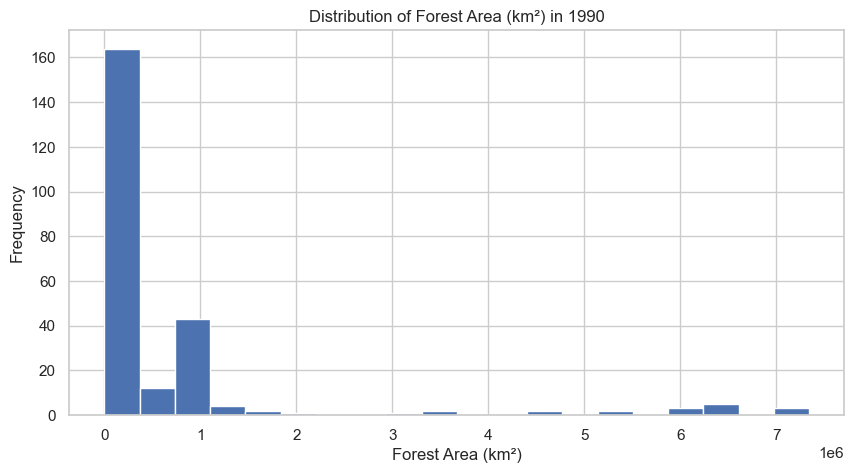

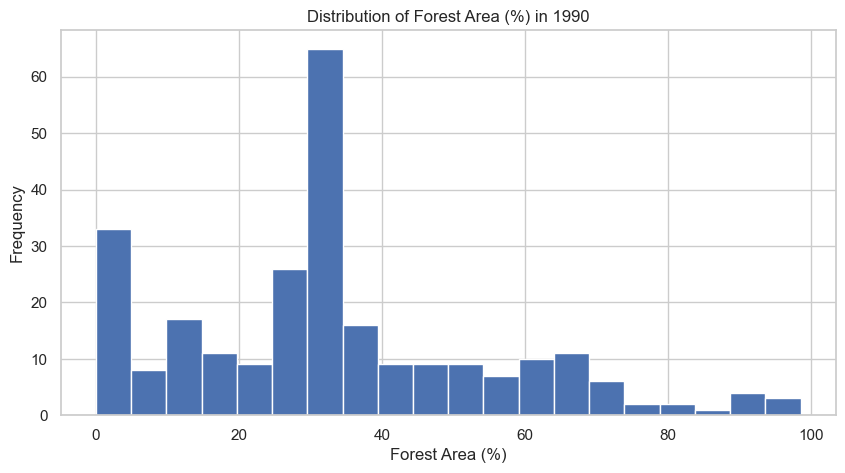

In [6]:
import matplotlib.pyplot as plt

# Plot histogram for forest area in square kilometers in 1990
plt.figure(figsize=(10, 5))
forest_area_km['1990'].hist(bins=20)
plt.title("Distribution of Forest Area (km²) in 1990")
plt.xlabel("Forest Area (km²)")
plt.ylabel("Frequency")
plt.show()

# Plot histogram for forest area percentage in 1990
plt.figure(figsize=(10, 5))
forest_area_percent['1990'].hist(bins=20)
plt.title("Distribution of Forest Area (%) in 1990")
plt.xlabel("Forest Area (%)")
plt.ylabel("Frequency")
plt.show()


### *3. Trends Over Time (Line Plot)*

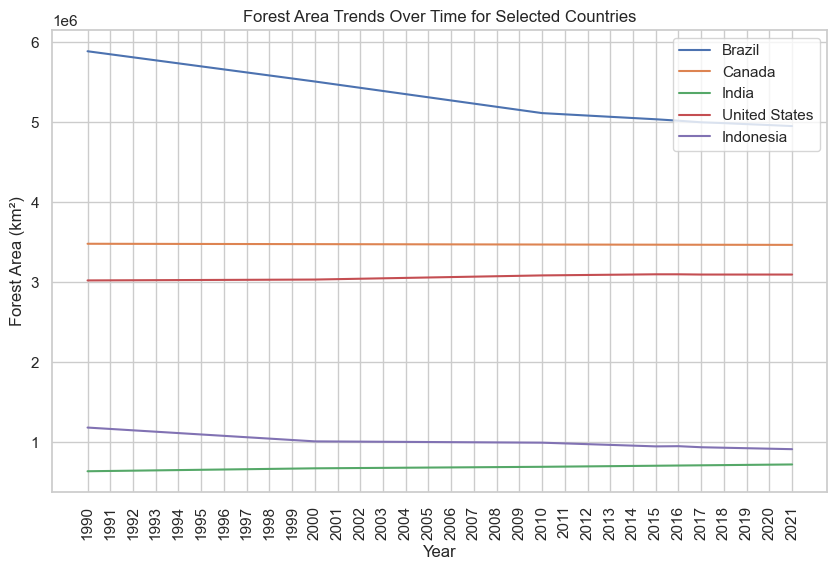

In [7]:
# Plotting the trend of forest area over the years for a few selected countries
countries = ['Brazil', 'Canada', 'India', 'United States', 'Indonesia']
forest_area_km_selected = forest_area_km[forest_area_km['Country_Name'].isin(countries)]
years = [str(year) for year in range(1990, 2022)]

plt.figure(figsize=(10, 6))
for country in countries:
    plt.plot(years, forest_area_km_selected[forest_area_km_selected['Country_Name'] == country].iloc[0, 2:], label=country)
plt.title("Forest Area Trends Over Time for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Forest Area (km²)")
plt.legend()
plt.xticks(rotation=90)
plt.show()


### *4. Correlation Between Years (Correlation Matrix)*

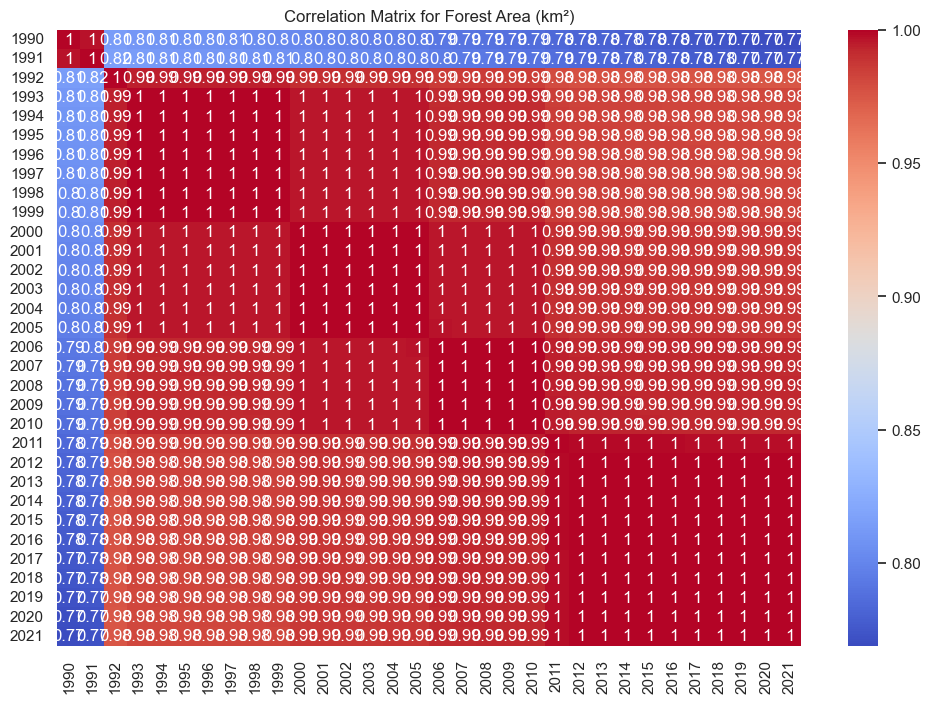

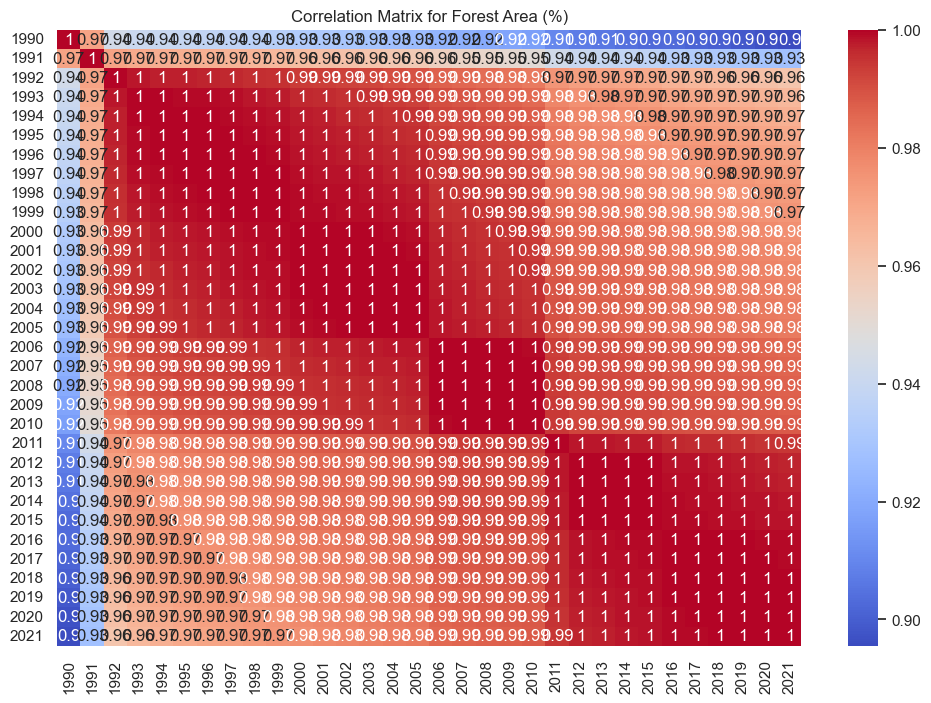

In [8]:
import seaborn as sns

# Correlation matrix for forest area in square kilometers
corr_km = forest_area_km[years].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_km, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Forest Area (km²)")
plt.show()

# Correlation matrix for forest area percentage
corr_percent = forest_area_percent[years].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_percent, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Forest Area (%)")
plt.show()


### *5. Box Plot to Visualize Outliers*

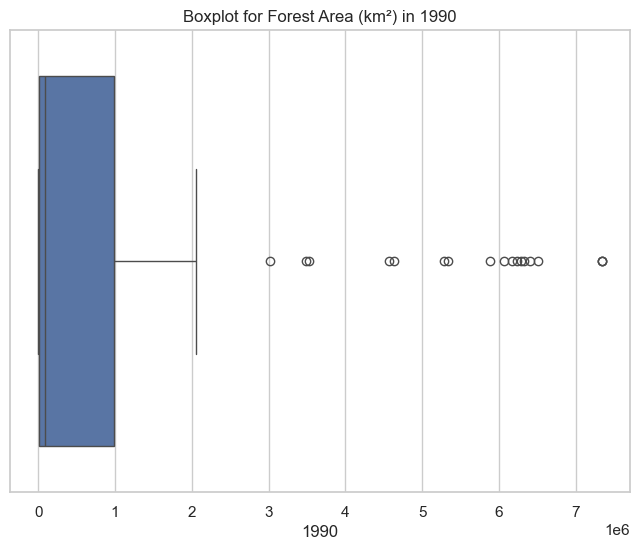

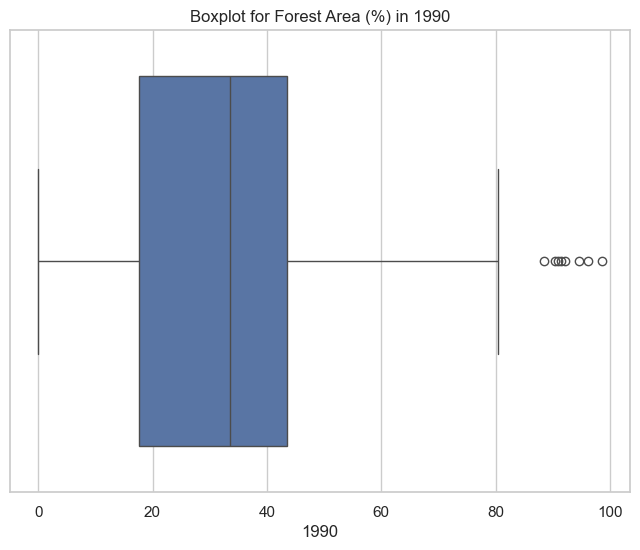

In [9]:
# Boxplot for forest area in 1990
plt.figure(figsize=(8, 6))
sns.boxplot(x=forest_area_km['1990'])
plt.title("Boxplot for Forest Area (km²) in 1990")
plt.show()

# Boxplot for forest area percentage in 1990
plt.figure(figsize=(8, 6))
sns.boxplot(x=forest_area_percent['1990'])
plt.title("Boxplot for Forest Area (%) in 1990")
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
